# WAMEX Rockchip Cobalt Correlations

In [96]:
import pandas as pd

In [79]:
file_path = 'Merged_Ni_lessthan15km.csv'

df = pd.read_csv(file_path, index_col=0)
df.head(3)

,Unnamed: 0_x,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag,lat,long,Unnamed: 0_y,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,33,56.0,420.0,9.0,14.0,0.01,1.0,NaN,NaN,NaN,NaN,-17.234642,128.032146,46661,"(-17.34893, 128.022095)",S0001442,-17.234642,128.032146,12.693593881734987 km
1,33,56.0,420.0,9.0,14.0,0.01,1.0,NaN,NaN,NaN,NaN,-17.234642,128.032146,46662,"(-17.31078, 128.023499)",S0002890,-17.234642,128.032146,8.476376684524638 km
2,33,56.0,420.0,9.0,14.0,0.01,1.0,NaN,NaN,NaN,NaN,-17.234642,128.032146,46663,"(-17.3526, 128.027695)",S0019720,-17.234642,128.032146,13.063277176872425 km


In [80]:
df.shape

(150625, 19)

In [81]:
df_unique = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'lat', 'long', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

df_unique = df_unique.drop_duplicates()

In [43]:
print(f"Amount of Duplicate rows: {df.shape[0] - df_unique.shape[0]}")

Amount of Duplicate rows: 127392


In [20]:
df_unique.shape

(23233, 12)

In [82]:
df_unique.isna().sum()

Ni               0
Cu             158
Co               0
Pd           11999
Au            4200
Pt           12136
Rh           21331
Fe            7917
S            11681
Ag            7410
wamex_lat        0
wamex_lon        0
dtype: int64

In [83]:
#change NAs to 0
df_unique = df_unique.fillna(0)

In [84]:
def replace_neg9999(val):
    if val == -9999: 
        return 0
    else:
        return val
    
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays(df):
    df = df.applymap(replace_neg9999)
    df = df.applymap(abs_halve_neg_val)
    df = df[df['Ni'] < 300000]
    
    return df

In [85]:
df_minerals = df_unique.drop(columns=['wamex_lat', 'wamex_lon'])

df_unique.loc[:, df_minerals.columns] = clean_assays(df_unique.loc[:,df_minerals.columns])
df_unique.shape

(23233, 12)

In [86]:
df_unique = df_unique.drop_duplicates()
df_unique.shape

(23117, 12)

In [87]:
df_unique.isna().sum() #only one row where Ni > 300000

Ni           1
Cu           1
Co           1
Pd           1
Au           1
Pt           1
Rh           1
Fe           1
S            1
Ag           1
wamex_lat    0
wamex_lon    0
dtype: int64

In [88]:
df_unique = df_unique.dropna()

<AxesSubplot:>

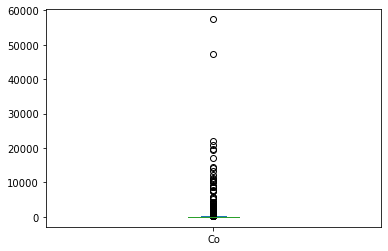

In [89]:
df_unique['Co'].plot(kind='box')

In [90]:
#remove two obvious outliers
df_unique = df_unique[df_unique['Co'] < 40000]

In [91]:
df_unique_corr = df_unique.corr()

In [92]:
df_unique.corr()

,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag,wamex_lat,wamex_lon
Ni,1.000000,0.019451,0.293238,0.009413,0.146162,-0.022393,0.005301,0.014679,0.009477,0.014856,0.002104,0.042935
Cu,0.019451,1.000000,0.016596,0.003723,-0.010194,-0.002590,0.000947,-0.009478,0.013286,-0.000797,0.018308,-0.017361
Co,0.293238,0.016596,1.000000,0.021103,-0.026063,-0.000505,0.000132,0.022590,0.035508,0.024334,0.005555,-0.008729
Pd,0.009413,0.003723,0.021103,1.000000,-0.004379,-0.001836,-0.000410,0.015056,0.005892,-0.000854,0.061988,0.043266
Au,0.146162,-0.010194,-0.026063,-0.004379,1.000000,-0.019026,-0.003852,-0.044106,0.027937,0.129761,0.091280,0.379493
Pt,-0.022393,-0.002590,-0.000505,-0.001836,-0.019026,1.000000,-0.000407,-0.037532,-0.004585,0.008988,0.048472,0.120067
Rh,0.005301,0.000947,0.000132,-0.000410,-0.003852,-0.000407,1.000000,0.010076,-0.000231,-0.000819,0.000052,-0.008241
Fe,0.014679,-0.009478,0.022590,0.015056,-0.044106,-0.037532,0.010076,1.000000,0.005667,0.051108,0.000582,-0.112697
S,0.009477,0.013286,0.035508,0.005892,0.027937,-0.004585,-0.000231,0.005667,1.000000,0.003245,0.020227,0.014858
Ag,0.014856,-0.000797,0.024334,-0.000854,0.129761,0.008988,-0.000819,0.051108,0.003245,1.000000,-0.003475,0.056522


In [93]:
df_unique_corr['dataframe'] = 'WAMEX Rockchip'

In [94]:
df_unique_corr

,Ni,Cu,Co,Pd,Au,Pt,Rh,Fe,S,Ag,wamex_lat,wamex_lon,dataframe
Ni,1.000000,0.019451,0.293238,0.009413,0.146162,-0.022393,0.005301,0.014679,0.009477,0.014856,0.002104,0.042935,WAMEX Rockchip
Cu,0.019451,1.000000,0.016596,0.003723,-0.010194,-0.002590,0.000947,-0.009478,0.013286,-0.000797,0.018308,-0.017361,WAMEX Rockchip
Co,0.293238,0.016596,1.000000,0.021103,-0.026063,-0.000505,0.000132,0.022590,0.035508,0.024334,0.005555,-0.008729,WAMEX Rockchip
Pd,0.009413,0.003723,0.021103,1.000000,-0.004379,-0.001836,-0.000410,0.015056,0.005892,-0.000854,0.061988,0.043266,WAMEX Rockchip
Au,0.146162,-0.010194,-0.026063,-0.004379,1.000000,-0.019026,-0.003852,-0.044106,0.027937,0.129761,0.091280,0.379493,WAMEX Rockchip
Pt,-0.022393,-0.002590,-0.000505,-0.001836,-0.019026,1.000000,-0.000407,-0.037532,-0.004585,0.008988,0.048472,0.120067,WAMEX Rockchip
Rh,0.005301,0.000947,0.000132,-0.000410,-0.003852,-0.000407,1.000000,0.010076,-0.000231,-0.000819,0.000052,-0.008241,WAMEX Rockchip
Fe,0.014679,-0.009478,0.022590,0.015056,-0.044106,-0.037532,0.010076,1.000000,0.005667,0.051108,0.000582,-0.112697,WAMEX Rockchip
S,0.009477,0.013286,0.035508,0.005892,0.027937,-0.004585,-0.000231,0.005667,1.000000,0.003245,0.020227,0.014858,WAMEX Rockchip
Ag,0.014856,-0.000797,0.024334,-0.000854,0.129761,0.008988,-0.000819,0.051108,0.003245,1.000000,-0.003475,0.056522,WAMEX Rockchip


In [95]:
df_unique_corr.to_csv('Co_correlations.csv')